In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.sans-serif'] = ['SimSun']  # 使用宋体或其他支持中文的字体
plt.rcParams['axes.unicode_minus'] = False  # 处理负号显示问题

In [4]:

# Load the CSV file
file_path = r"D:\ArcGISProjects\workspace\frequency_filter\dy_frequency.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)
df.sample(1)

,TL,YL,TS,TZ,DEM,AnalyticalHillshading,Aspect,ChannelNetworkBaseLevel,ChannelNetworkDistance,ClosedDepressions,...,SecondMoment,Variance,PRE,SRA,TMP,VAP,WIND,BIO,LON,LAT
16878,黄壤,黄壤,硅质黄壤,厚腐殖层薄土层硅质黄壤,1429.3,0.969317,3.370809,1427.3569,1.943115,NaN,...,1.0,0.0,102.25,12776.583,13.425,1.345,1.95,193.3339,431245.0,2900300.0


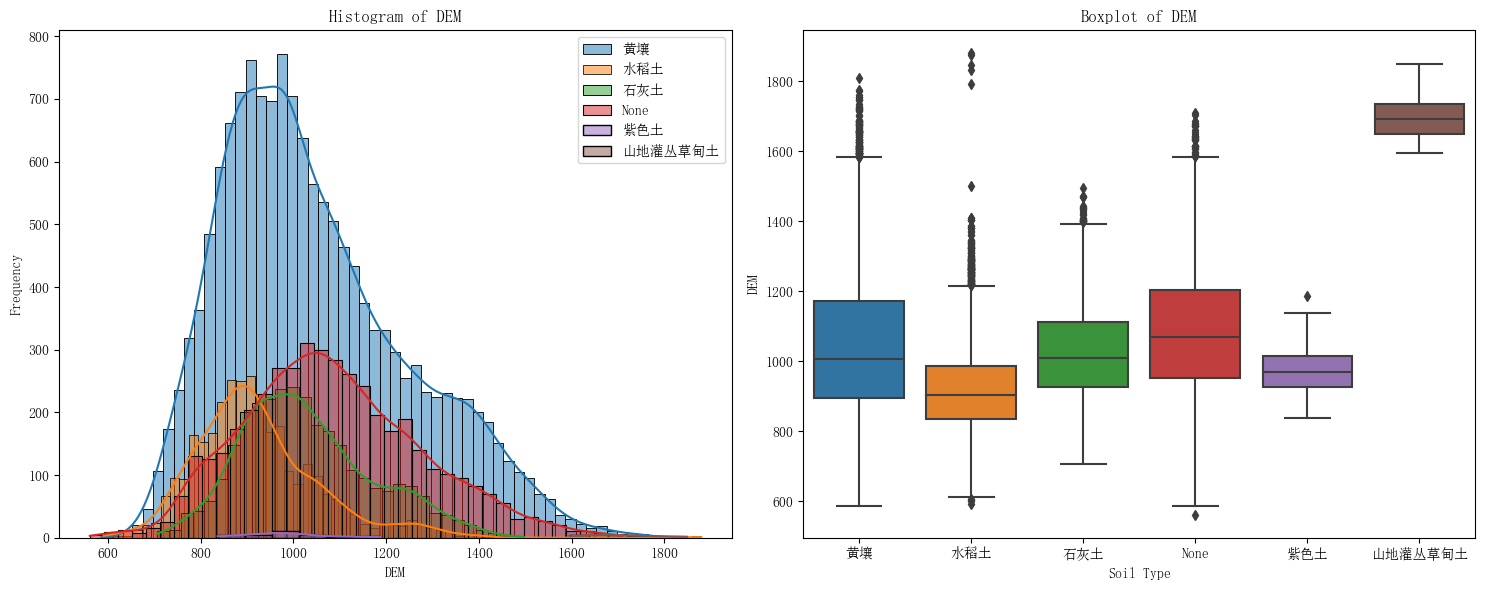

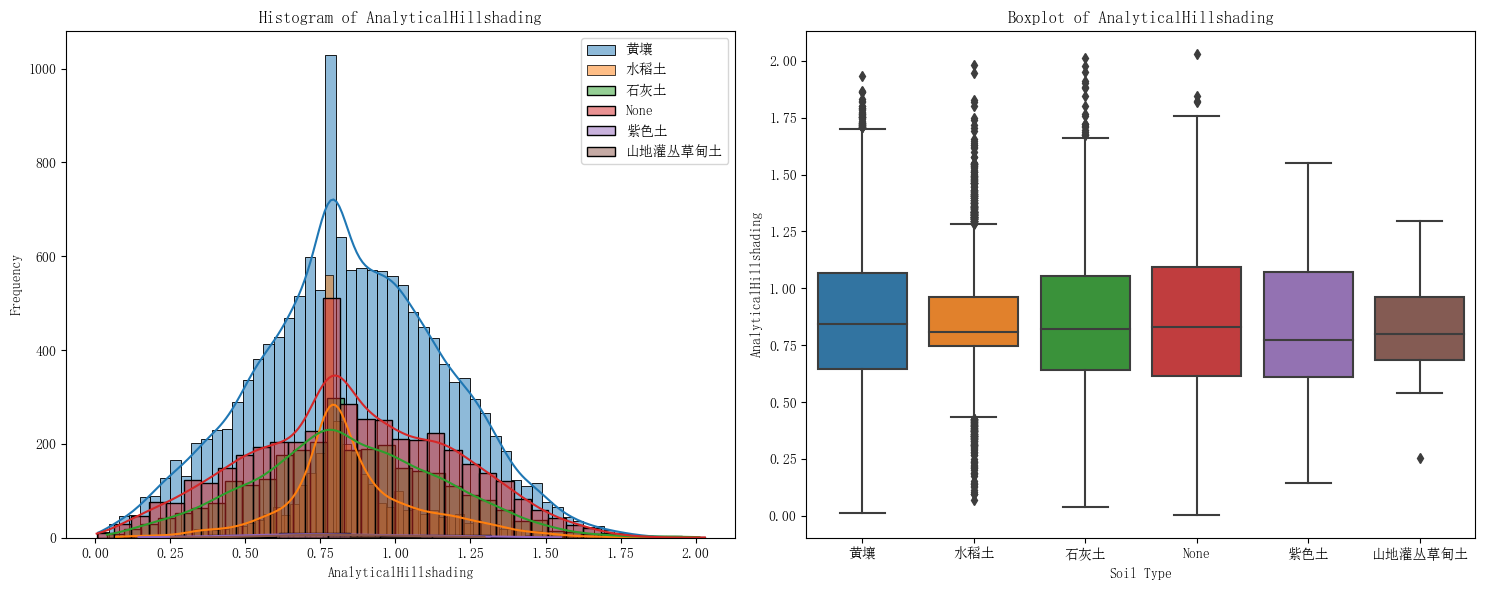

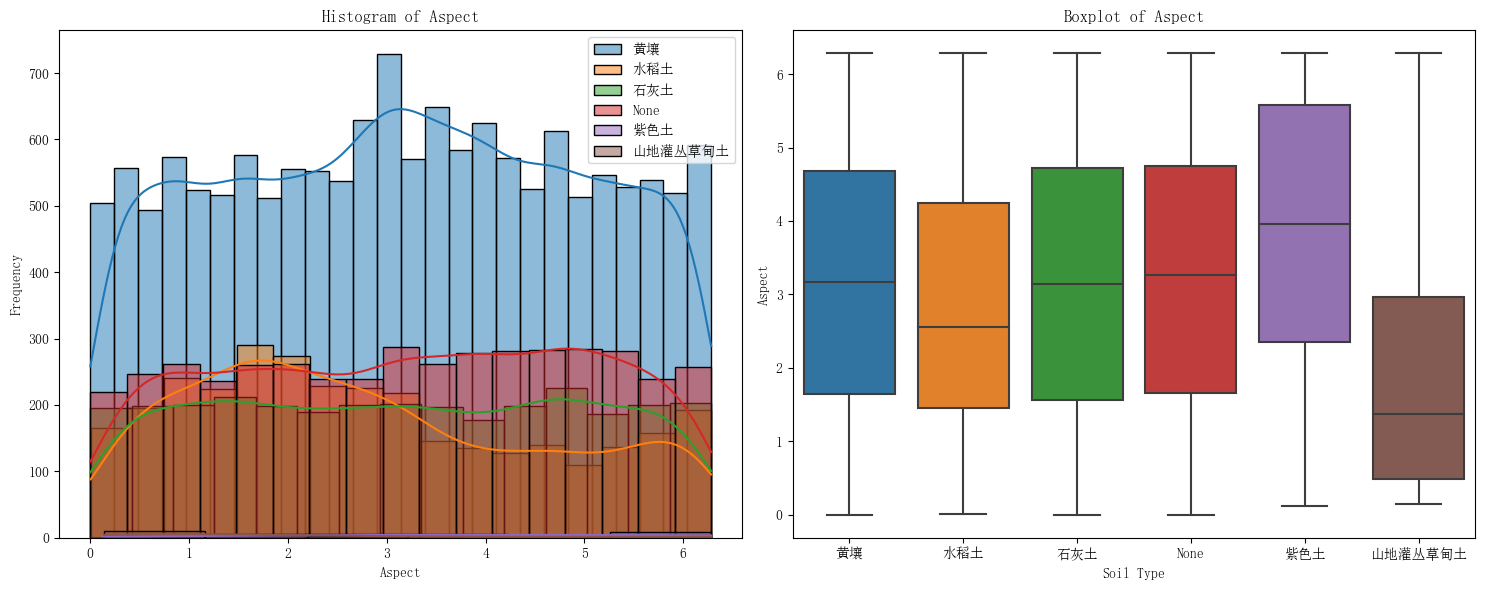

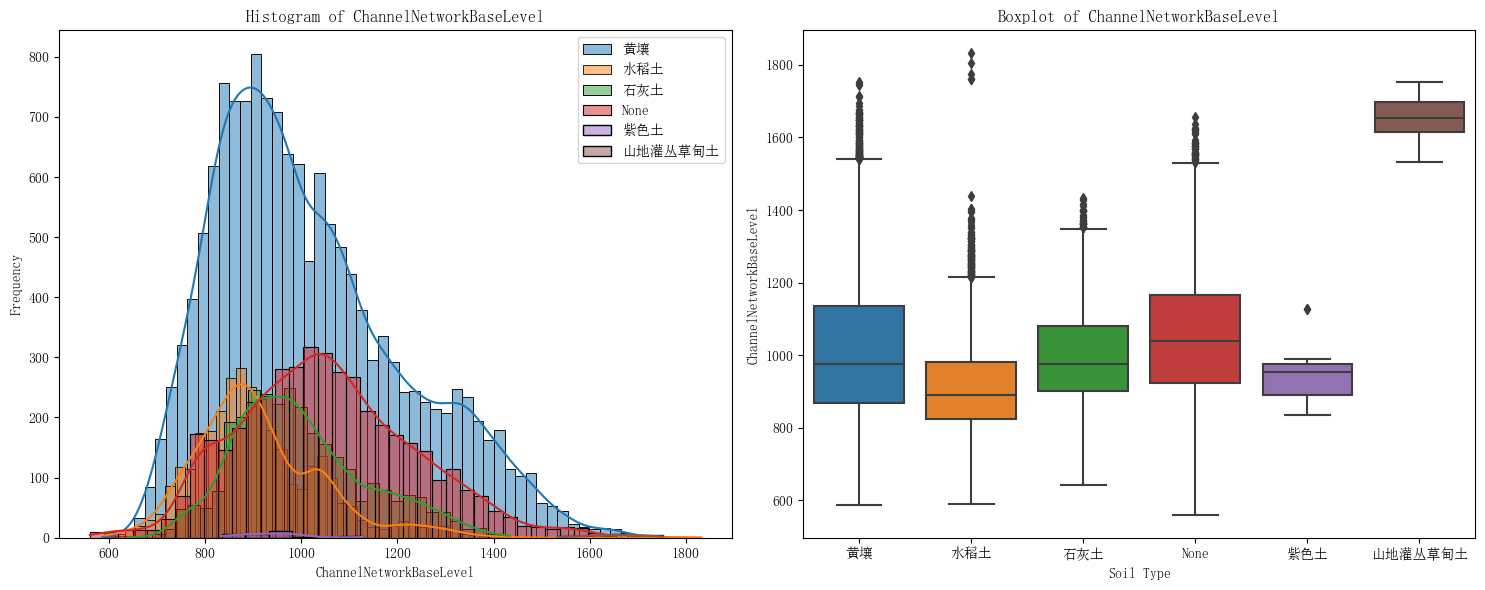

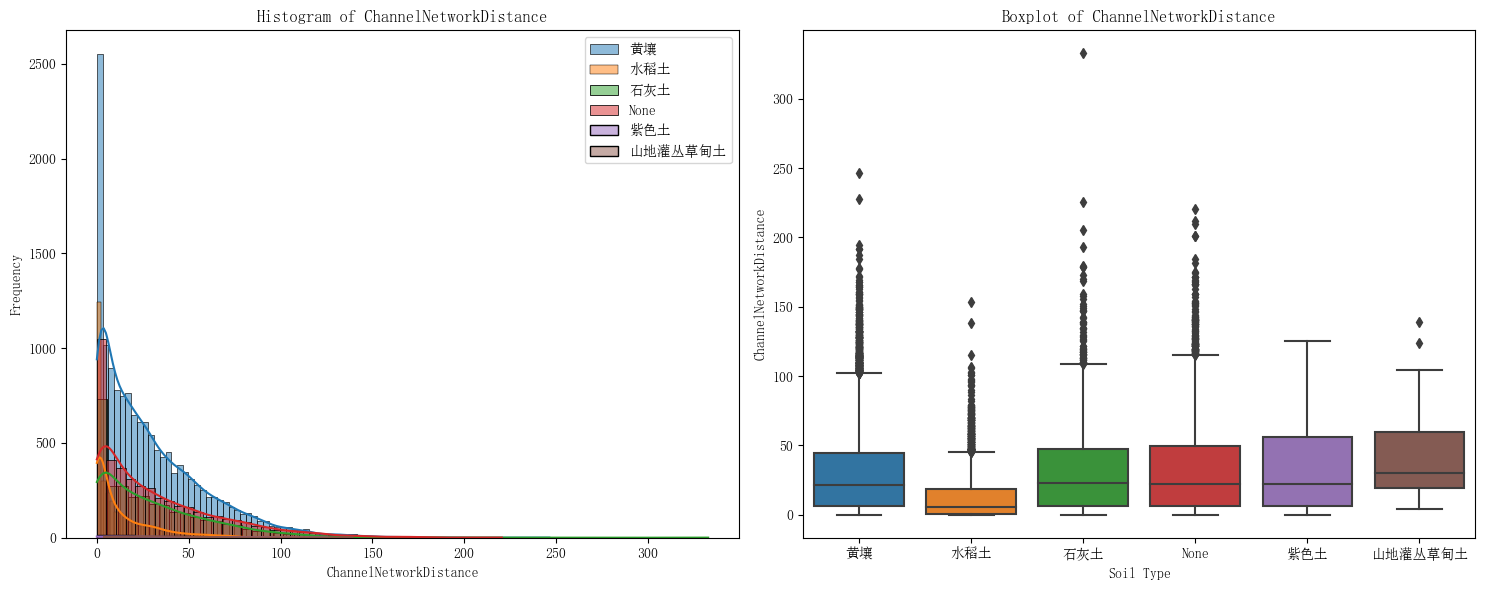

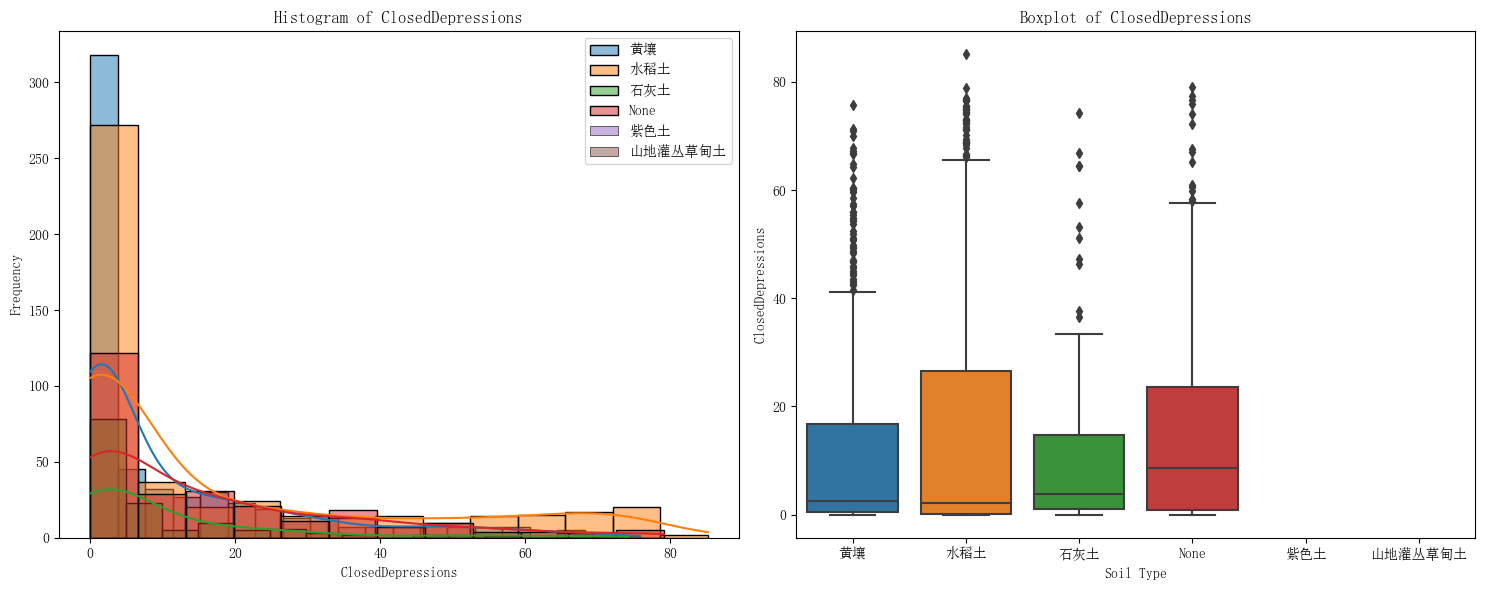

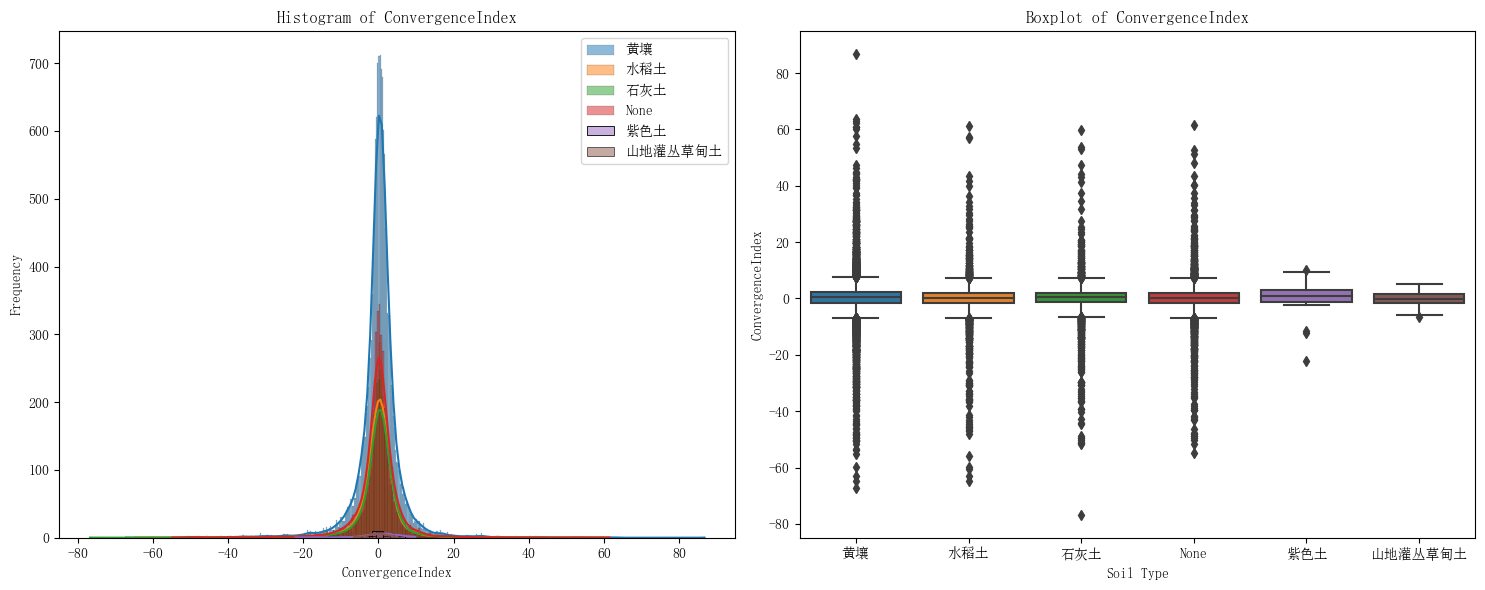

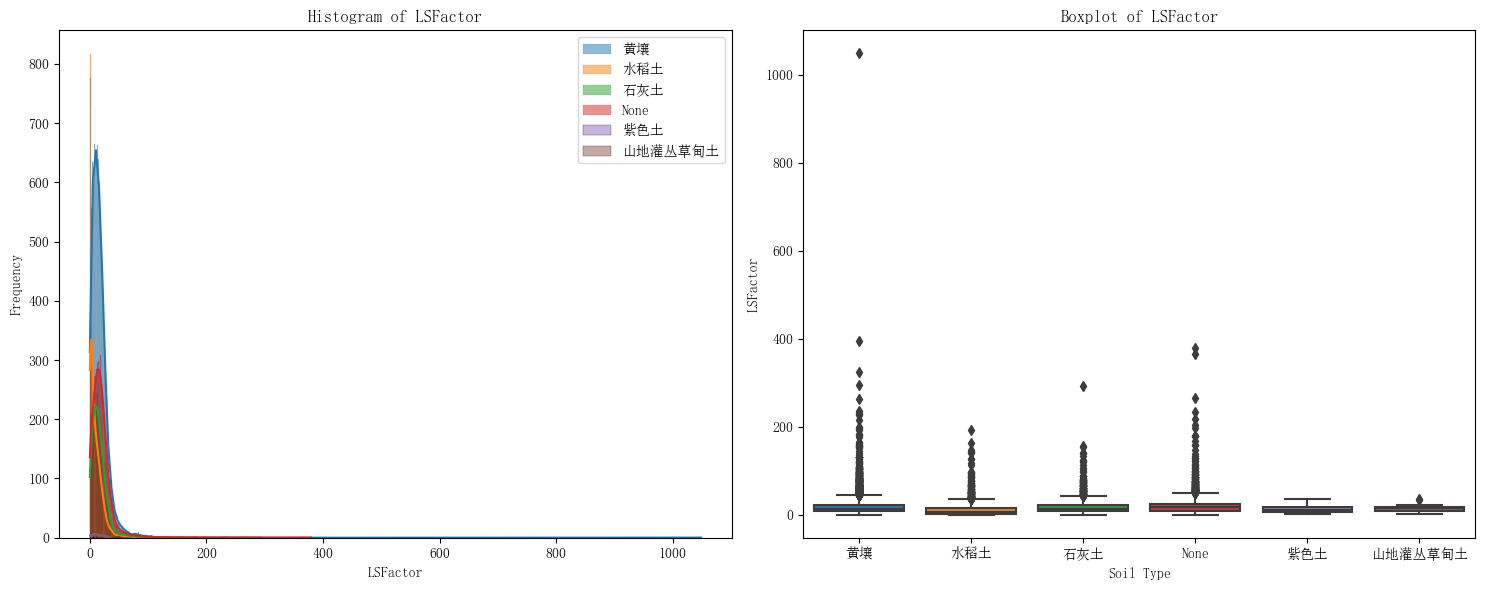

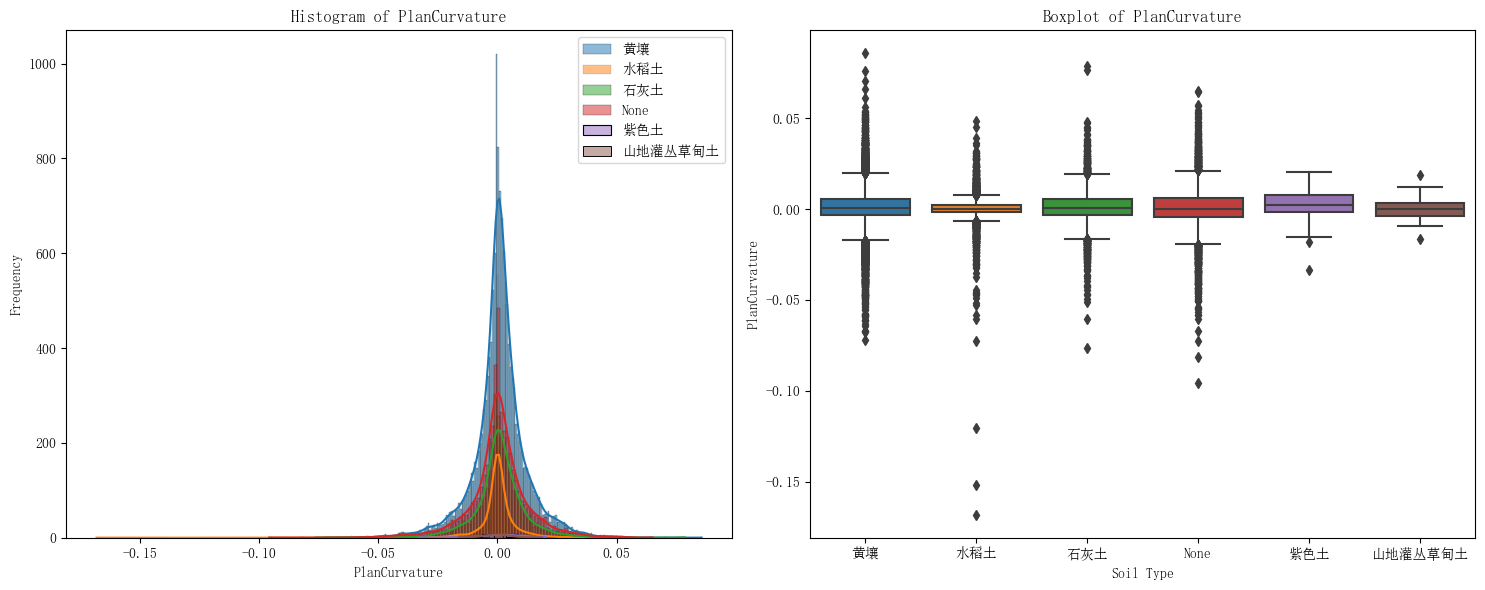

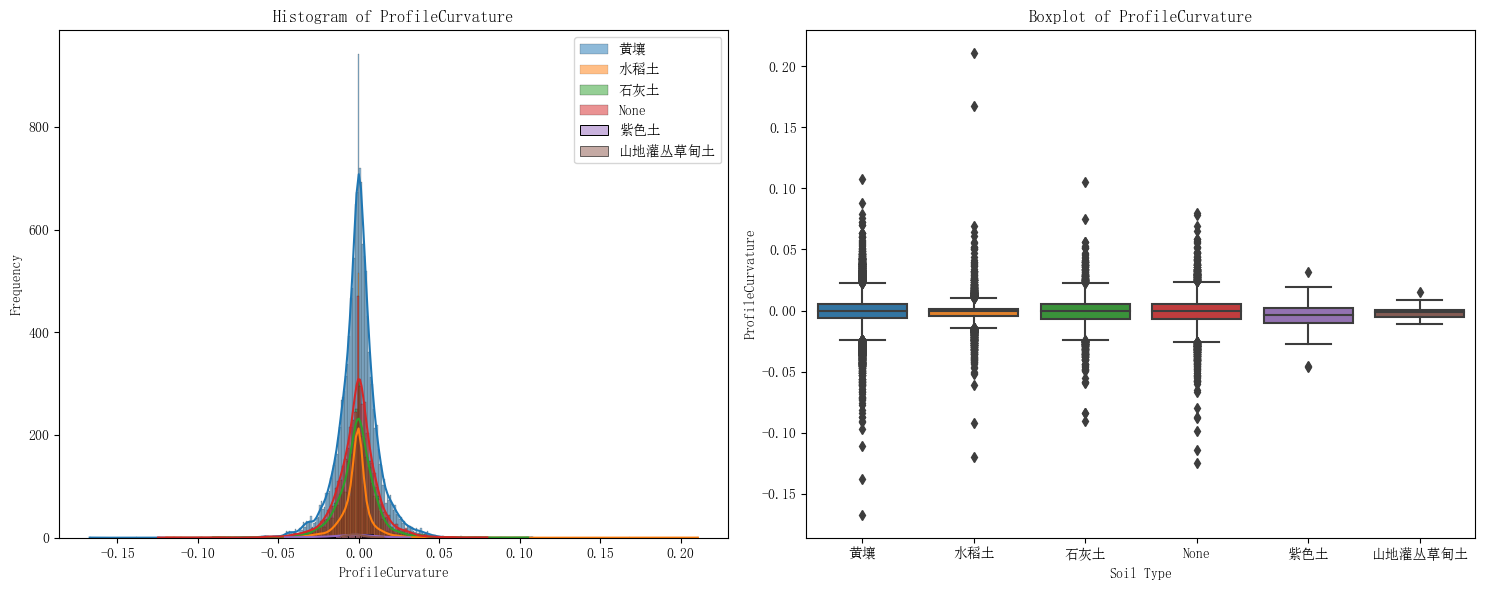

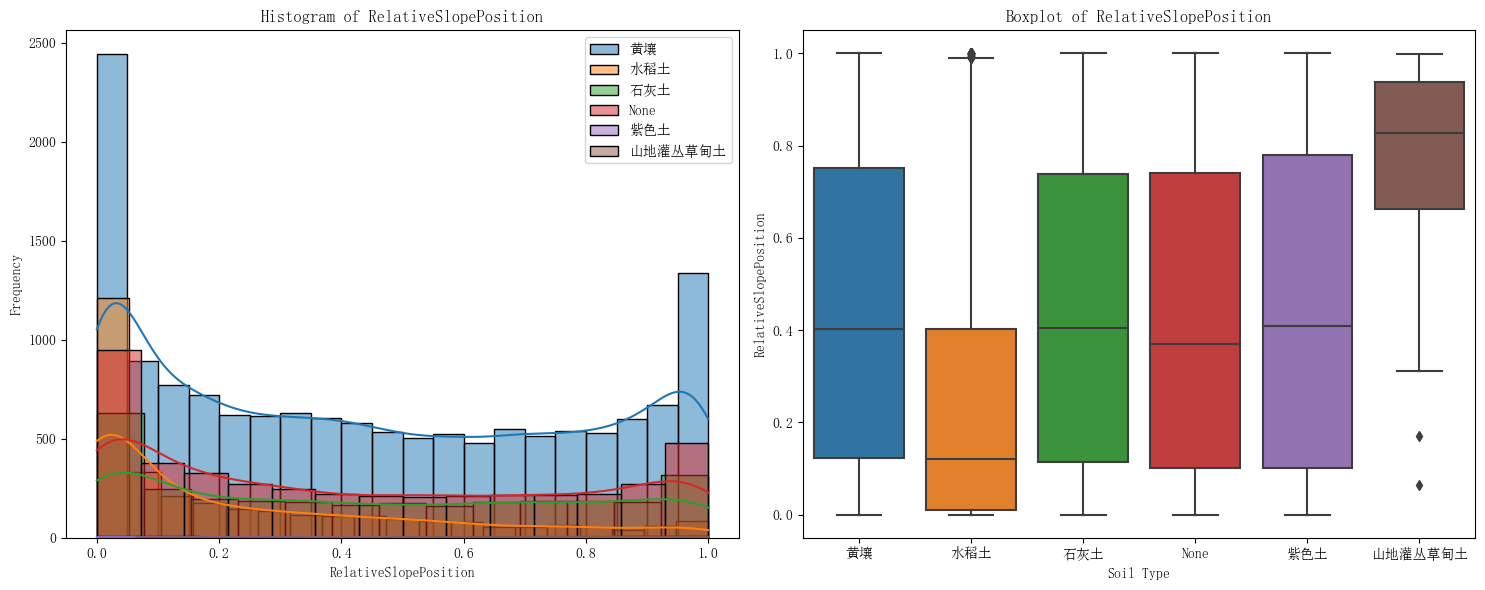

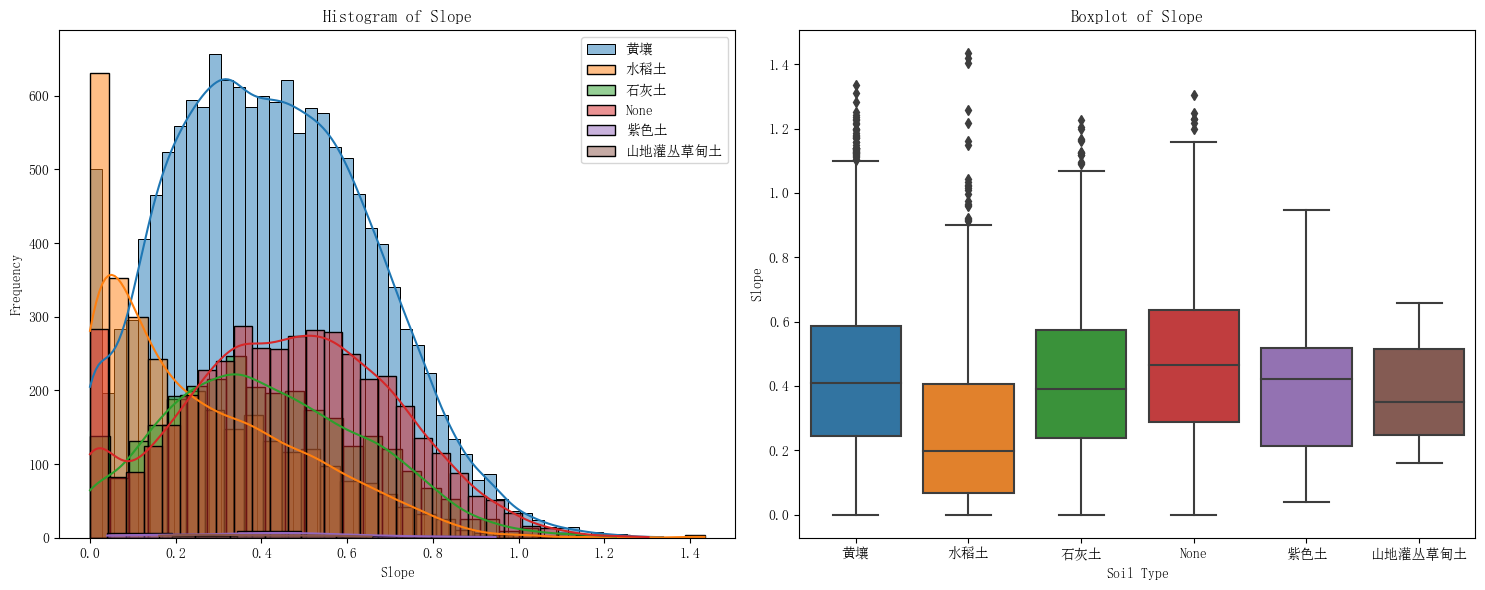

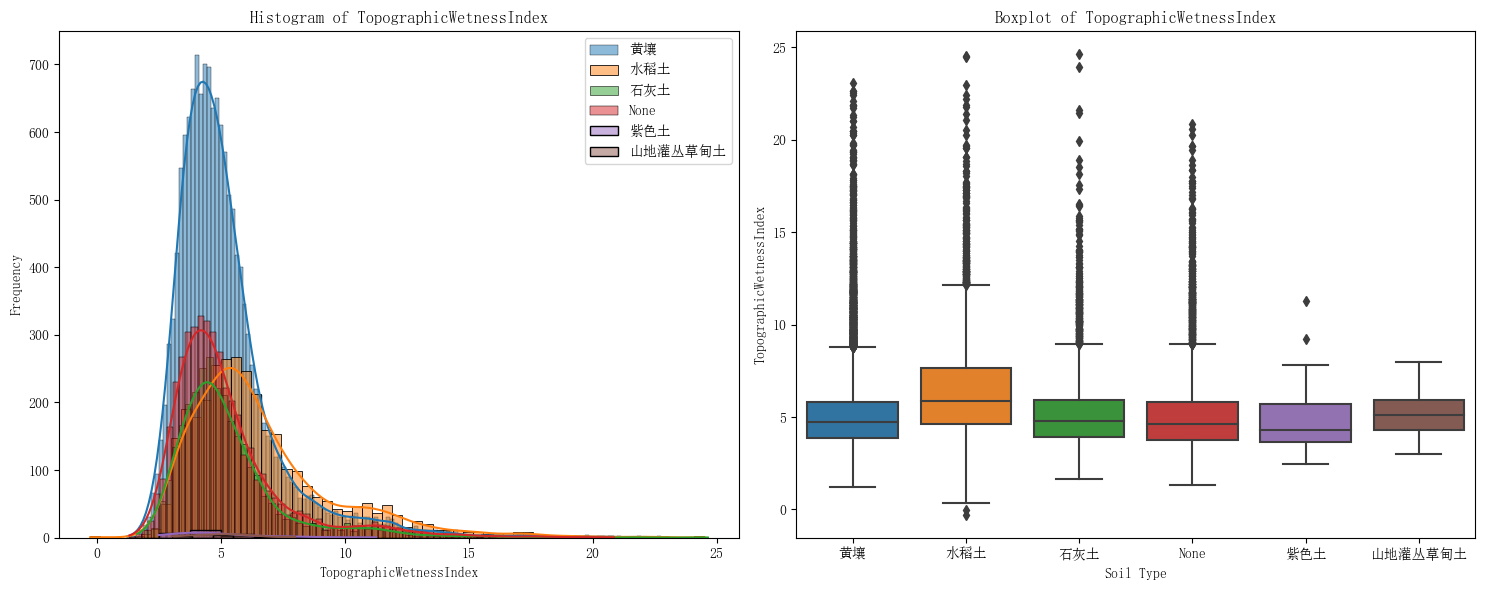

KeyboardInterrupt: 

In [6]:
# Filter out the columns that are not needed for analysis
df_filtered = df.drop(['YL', 'TS', 'TZ'], axis=1)

# Identify the soil types (土类) and the environmental features
soil_types = df_filtered['TL'].unique()
env_features = df_filtered.columns.drop('TL')

# Function to plot histograms and boxplots for each feature across soil types
def plot_feature_distribution(feature, df_filtered, soil_types):
    plt.figure(figsize=(15, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    for soil_type in soil_types:
        sns.histplot(df_filtered[df_filtered['TL'] == soil_type][feature], label=soil_type, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x='TL', y=feature, data=df_filtered)
    plt.title(f'Boxplot of {feature}')
    plt.xlabel('Soil Type')
    plt.ylabel(feature)

    plt.tight_layout()
    plt.show()

# Plotting the distribution for each environmental feature
for feature in env_features:
    plot_feature_distribution(feature, df_filtered, soil_types)